In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import mglearn
import pandas as pd
from sklearn.model_selection import train_test_split

w[0]: 0.393906  b: -0.031804


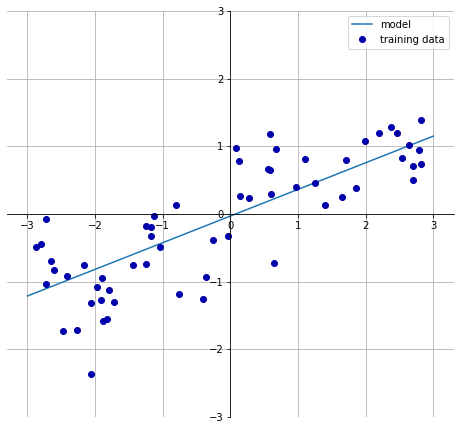

In [2]:
mglearn.plots.plot_linear_regression_wave()

1次元の特徴量に対しては線形モデルはいくらか歪んだ視点を与えるが、特徴量が多い場合は非常に有効である  
特に訓練データ数よりも特徴量の方が多い場合は訓練データセット上で任意のターゲットyを線形関数として完全にモデル化できる。  
しかし、そのモデル化に意味はない

# Linear regression (aka ordinary least squares (OLS))
 aka:Also Known As  
 minimize the mean squared error between predictions and true 
 mean squared error is the sum of the squared differences between pred and true
 
 線形回帰ではパラメータの数は特徴量の数によって決まるが（これは利点）、modelの複雑性をコントロールする術はない

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

In [5]:
lr.coef_

array([0.39390555])

In [6]:
lr.intercept_

-0.031804343026759746

sklearn では訓練データ由来の属性にはすべてアンダースコアがつく  
（ユーザーが設定したパラメータと区別するため）

In [7]:
lr.score(X_train, y_train) 

0.6700890315075756

In [8]:
lr.score(X_test, y_test)

0.65933685968637

these values are not very good, but training and test scores are very close
➡ underfitting

１次元データセット（特徴量が一つ）については線形モデルはシンプル過ぎる（強すぎる制限）のでoverfittingよりもunderfittingの危険性のほうがある

対して高次元データセットではoverfittingになりやすい

# LinearRegression for a more complex dataset(Boston Housing dataset)

In [14]:
X, y = mglearn.datasets.load_extended_boston() #特徴量を増やしたもの

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

C:\Users\shuta\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [15]:
X.shape # 特徴量 104個

(506, 104)

In [16]:
lr.score(X_train, y_train)

0.9520519609032729

In [17]:
lr.score(X_test, y_test)

0.6074721959665842

This discrepancy between performance on the training set and the test set is a clear sign of overfitting,   
➡ 複雑性をコントロールできるモデルを考える必要がある

# Ridge Regression
Linear Regression + 重み w をできる限り小さくする制限をかける  
overfittingを回避するためにモデルに制限をかける(モデルをよりシンプルにする方向)  
各特徴量が出力に与える影響をできる限り小さくする  
wの値に制限がかかればそれだけ表現の幅は狭くなる➡シンプルなモデル  
L2 正則化

In [18]:
from sklearn.linear_model import Ridge

In [26]:
ridge = Ridge().fit(X_train, y_train)
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.8857966585170941
0.7527683481744758


リッジ回帰ではモデルの複雑性と訓練データに対するスコアはトレードオフ

次の損失関数を最小化する  
デフォルトでalpha=1  

||y - Xw||^2_2 + alpha * ||w||^2_2

alpha 大きい（ペナルティが大きい）➡ 制限を強める（モデルの単純化）  
alphs 小さい（ペナルティが小さい）➡ 制限を弱める（モデルの複雑化）  

alpah=0ではただの線形回帰

In [45]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print(ridge10.score(X_train, y_train))
print(ridge10.score(X_test, y_test))

0.7882787115369615
0.6359411489177311


In [46]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print(ridge01.score(X_train, y_train))
print(ridge01.score(X_test, y_test))

0.9282273685001985
0.7722067936480156


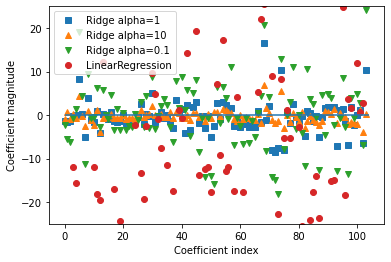

In [47]:
plt.plot(ridge.coef_, "s", label=("Ridge alpha=1"))
plt.plot(ridge10.coef_, "^", label=("Ridge alpha=10"))
plt.plot(ridge01.coef_, "v", label=("Ridge alpha=0.1"))

plt.plot(lr.coef_, "o", label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

plt.hlines(0,0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

alphaが大きいほどパラメータの大きさは小さい（制限がかかっている）

正則化の影響を理解する方法としてalphaの値を固定して訓練データの量を変えることである

C:\Users\shuta\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

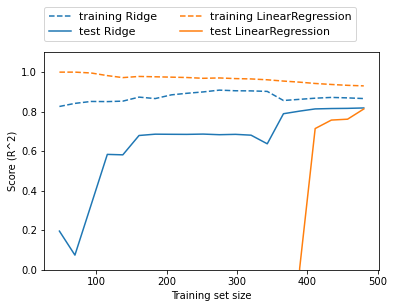

In [34]:
mglearn.plots.plot_ridge_n_samples()

Scoreは訓練データのサイズに依存（学習曲線 learning curves）

十分なデータセットがあるなら正則化はそこまで重要ではない

# Lasso Regression
L1正則化  
次の関数を最小化する（デフォルトはalpha=1）  
(1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1

影響の小さいパラメータをゼロにする（sparseな結果になる）  
無視する特徴量が出てくる（特徴量の自動選択ともいえる）  
➡　モデルの単純化 

In [38]:
from sklearn.linear_model import Lasso

In [40]:
lasso = Lasso().fit(X_train, y_train)
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))
print(np.sum(lasso.coef_ != 0))

0.29323768991114596
0.20937503255272272
4


underfitting  
制限が強すぎる（モデルを単純化しすぎている）  
alphaを小さくしてモデルを複雑化  
alphaを変えて損失関数の最小化が収束しないときはmax_iterも変える必要がある  
複雑なほど収束に時間がかかりそう。。

In [44]:
lasso001=Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print(lasso001.score(X_train, y_train))
print(lasso001.score(X_test, y_test))
print(np.sum(lasso001.coef_ != 0))

0.8962226511086497
0.7656571174549981
33


alphaを小さくし過ぎると再びoverfittingする

In [48]:
lasso00001=Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print(lasso00001.score(X_train, y_train))
print(lasso00001.score(X_test, y_test))
print(np.sum(lasso00001.coef_ != 0))

0.9507158754515462
0.6437467421273534
96


In [49]:
lasso001_noiter=Lasso(alpha=0.01).fit(X_train, y_train)
print(lasso001_noiter.score(X_train, y_train))
print(lasso001_noiter.score(X_test, y_test))
print(np.sum(lasso001_noiter.coef_ != 0))

0.8961122320864717
0.7677995670886713
32


C:\Users\shuta\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.690e+01, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(


Text(0, 0.5, 'Coefficient magnitude')

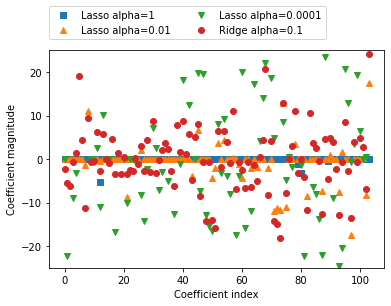

In [54]:
plt.plot(lasso.coef_, "s", label="Lasso alpha=1")
plt.plot(lasso001.coef_, "^", label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, "v", label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, "o", label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

Ridge(alpha=0.1)とLasso(alpha=0.01)は同じような性能だがridgeはすべての重みがnonzero  

実践的にはRidgeをfirst choiceとして使うことがよくある。  
特徴量が多くそのうち重要な重みが少しの場合はLassoを使うと良い。

Lassoは解釈しやすいモデルになる（重要でない重みは無視されて考慮すべき特徴量が減るから）

実用的にはLassoとRidgeを組み合わせたElasticNetが最良


$$
1 / (2 * n_{samples}) * ||y - Xw||^2_2 +  
\alpha * l1_{ratio} * ||w||_1  +  
0.5 * \alpha * (1 - l1_{ratio}) * ||w||^2_2
$$